In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [10]:
# load dataset and split features and targets 
data = load_iris()

# convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X = df.drop(['target'], axis=1)
y = df['target']

# describe dataset
print(f"Feature Names: {data.feature_names}")
print(f"Target Names: {data.target_names}\n")

print(f"[ Data Information ]")
print(df.info())
print(f"\n[ Statistics ]\n{df.describe()}")
print(f"\n[ Dataset ]\n{df}")

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']

[ Data Information ]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None

[ Statistics ]
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.0000

In [11]:
# split features and labels into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# create model
model = LogisticRegression()

# train model
model.fit(X_train, y_train)

# predict for model
y_pred = model.predict(X_test)

# evaulate model
accuracy = accuracy_score(y_test, y_pred)

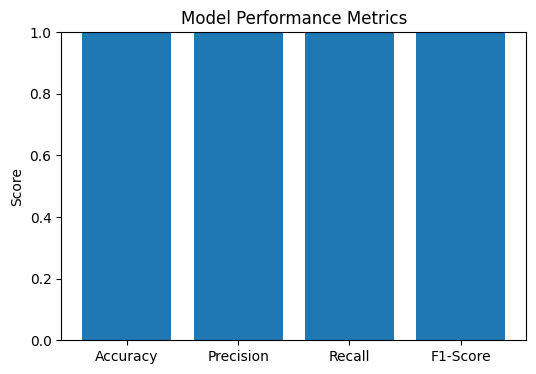

In [20]:
# display model performance
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average="macro"),
    "Recall": recall_score(y_test, y_pred, average="macro"),
    "F1-Score": f1_score(y_test, y_pred, average="macro")
}

plt.figure(figsize=(6,4))
plt.bar(metrics.keys(), metrics.values())
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Model Performance Metrics")
plt.show()

In [14]:
# save model
joblib.dump(model, 'models/logreg_iris.joblib')

['models/logreg_iris.joblib']